# Optimization

In [4]:
from fyp_code import loukas_esn, optimize, utilities as util
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,5]

In [2]:
# initialise input data
data_mg = util.data_mg()
data_sin1 = util.data_sin(order=1)
data_sin2 = util.data_sin(order=2)
data_sin3 = util.data_sin(order=3)
# initialise parameter spaces
# mackey glass
rhos_mg = np.linspace(0.8,1.4,20)
betas_mg = np.logspace(-9,-2,20)
alphas_mg = np.linspace(0.2,0.9,20)
rho_mg = 1.3
beta_mg = 1e-6
alpha_mg = 0.45
# sin3
rhos_sin3 = np.linspace(0.7,1.4,20)
betas_sin3 = np.logspace(-8,-2,20)
alphas_sin3 = np.linspace(0.2,0.8,20)
rho_sin3 = 1.3
beta_sin3 = 1e-6
alpha_sin3 = 0.45

## Initial parameter spaces

20%
40%
60%
80%
100%


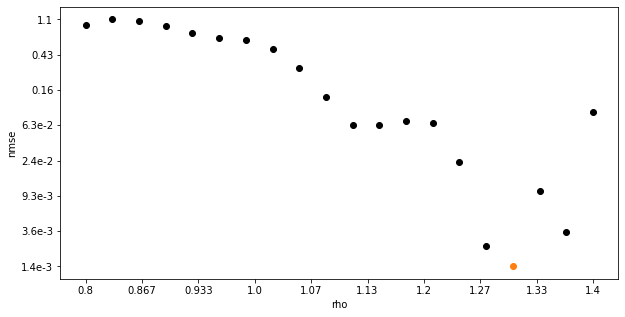

20%
40%
60%
80%
100%


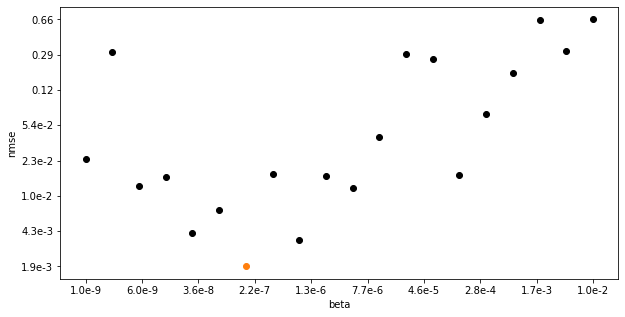

20%
40%
60%
80%
100%


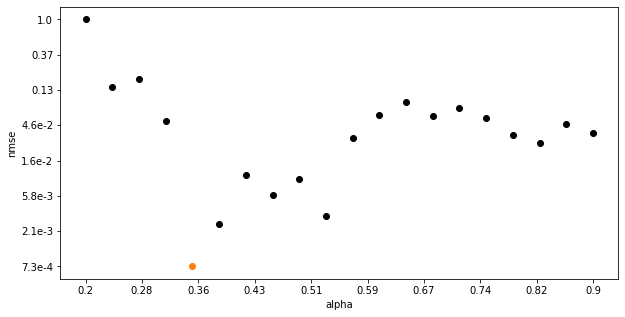

In [3]:
# Plotting the parameter spaces initialised at the top for mackey glass data
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_mg.plot_rhos()
opt_mg.plot_betas()
opt_mg.plot_alphas()

## Recursion

### Individual parameter recursions

In [ ]:
# recursive rho sin3
opt_sin3 = optimize.Optimizer(data_sin3, rhos_sin3, betas_sin3, alphas_sin3, rhoscale=rho_sin3, beta=beta_sin3, alpha=alpha_sin3, N=1000)
opt_rec_sin3 = optimize.rho_recursive(opt_sin3,recursions=3, search_size=8)
print("rho opt: {}".format(opt_rec_sin3.get_rho()))
print("rhos opt: {}\n".format(opt_rec_sin3.get_betas()))
opt_rec_sin3.plot_rhos()

In [ ]:
# recursive beta sin3
opt_sin3 = optimize.Optimizer(data_sin3, rhos_sin3, betas_sin3, alphas_sin3, rhoscale=rho_sin3, beta=beta_sin3, alpha=alpha_sin3, N=1000)
opt_rec_sin3 = optimize.beta_recursive(opt_sin3,recursions=3, search_size=10)
print("beta opt: {}".format(opt_rec_sin3.get_beta()))
print("betas opt: {}\n".format(opt_rec_sin3.get_betas()))
opt_rec_sin3.plot_betas()

In [ ]:
# recursive alpha sin3
opt_sin3 = optimize.Optimizer(data_sin3, rhos_sin3, betas_sin3, alphas_sin3, rhoscale=rho_sin3, beta=beta_sin3, alpha=alpha_sin3, N=1000)
opt_rec_sin3 = optimize.alpha_recursive(opt_sin3,recursions=3, search_size=12)
print("alpha opt: {}".format(opt_rec_sin3.get_alpha()))
print("alphas opt: {}\n".format(opt_rec_sin3.get_betas()))
opt_rec_sin3.plot_alphas()

In [ ]:
# recursive rho mackey glass
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_rec_mg = optimize.rho_recursive(opt_mg,recursions=3,search_size=20)
print("rho opt: {}".format(opt_rec_mg.get_rho()))
print("rhos opt: {}\n".format(opt_rec_mg.get_rhos()))
opt_rec_mg.plot_rhos()

In [ ]:
# recursive beta mackey glass
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_rec_mg = optimize.beta_recursive(opt_mg,recursions=3,search_size=20)
print("beta opt: {}".format(opt_rec_mg.get_beta()))
print("betas opt: {}\n".format(opt_rec_mg.get_betas()))
opt_rec_mg.plot_betas()

In [ ]:
# recursive alpha mackey glass
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_rec_mg = optimize.alpha_recursive(opt_mg,recursions=3,search_size=20)
print("alpha opt: {}".format(opt_rec_mg.get_alpha()))
print("alphas opt: {}\n".format(opt_rec_mg.get_alphas()))
opt_rec_mg.plot_alphas()

### Full recursive sequence

3 left
rho: 1.3
RUNNING...

2 left
rho: 1.305263157894737
RUNNING...

1 left
rho: 1.2830409356725148
RUNNING...

~ RHO RECURSION COMPLETED: rho = 1.2978557504873296 ~

3 left
beta: 1e-06
RUNNING...

2 left
beta: 1.623776739188721e-07
RUNNING...

1 left
beta: 9.734285811778848e-07
RUNNING...

~ BETA RECURSION COMPLETED: beta = 6.003818439729148e-08 ~

3 left
alpha: 0.45
RUNNING...

2 left
alpha: 0.45789473684210524
RUNNING...

1 left
alpha: 0.5875243664717349
RUNNING...

~ ALPHA RECURSION COMPLETED: alpha = 0.4665367121507472 ~

20%
40%
60%
80%
100%


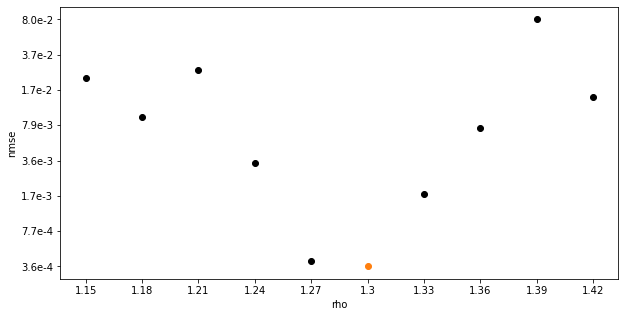

20%
40%
60%
80%
100%


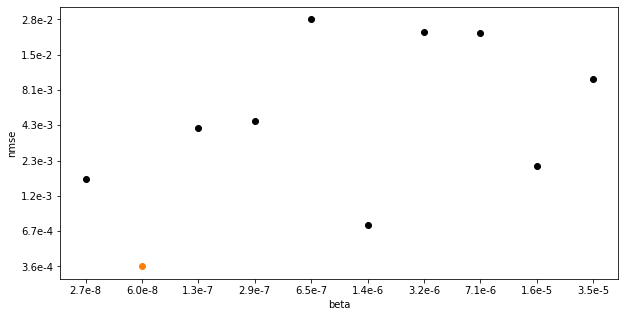

20%
40%
60%
80%
100%


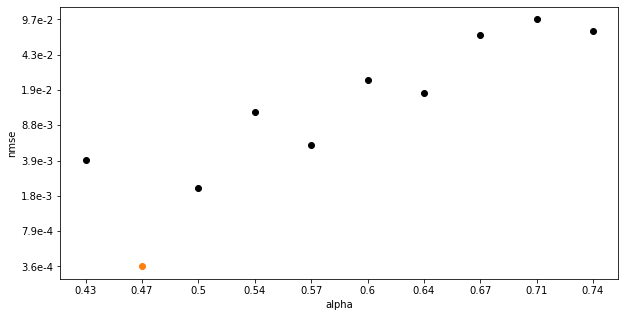

In [4]:
# full recursive optimization sequence
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_rec_mg = optimize.full_recursive(opt_mg)
# plotting
opt_rec_mg.plot_rhos()
opt_rec_mg.plot_betas()
opt_rec_mg.plot_alphas()
# optimized parameter extraction
rho_rec_mg = opt_rec_mg.get_rho()
beta_rec_mg = opt_rec_mg.get_beta()
alpha_rec_mg = opt_rec_mg.get_alpha()

## Nested grid search

In [6]:
# nested grid-search
# takes forever (5-10 min) but gives good results
rho_g, beta_g, alpha_g, nmse_g = opt_rec_mg.rho_beta_alpha(prnt=True)

10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
rho: 1.416374269005848
beta: 6.538296142127446e-07
alpha: 0.7430799220272905
nmse: 6.466604722561137e-05


## Optimization comparisons

nmse test: 0.15285859750359923


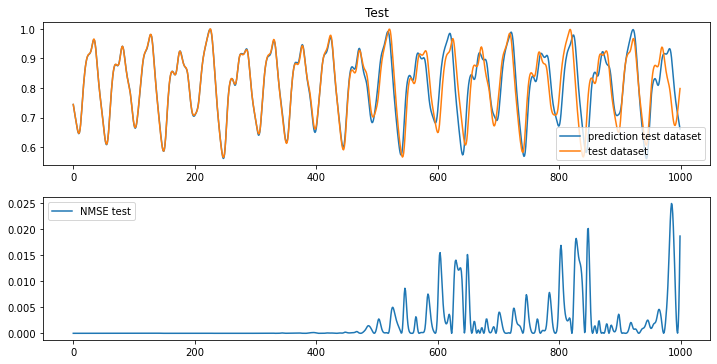

In [7]:
# using initial hand-estimated paramters
esn_mg = loukas_esn.Esn(data_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, Ttrain=1000, Twashout=200, N=1000)
esn_mg.train()
#esn_mg.validate(val_time=1000)
esn_mg.test(test_time=1000)
print("nmse test: {}".format(esn_mg.nmse_test))
esn_mg.plot_test()

nmse test: 0.06563529742798971


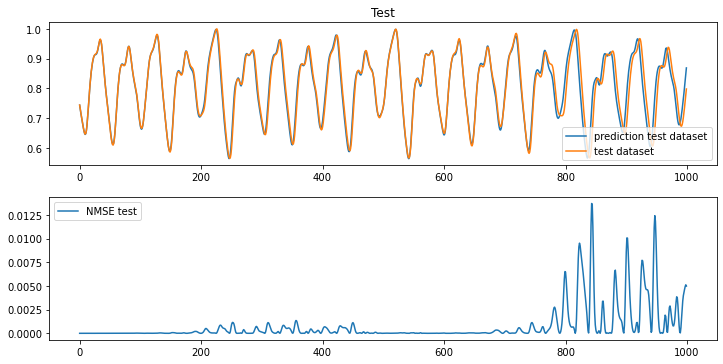

In [8]:
# using recursion-generated parameters
esn_mg = loukas_esn.Esn(data_mg, rhoscale=rho_rec_mg, beta=beta_rec_mg, alpha=alpha_rec_mg, Ttrain=1000, Twashout=200, N=1000)
esn_mg.train()
#esn_mg.validate(val_time=1000)
esn_mg.test(test_time=1000)
print("nmse test: {}".format(esn_mg.nmse_test))
esn_mg.plot_test()

nmse test: 0.0005247312001853945


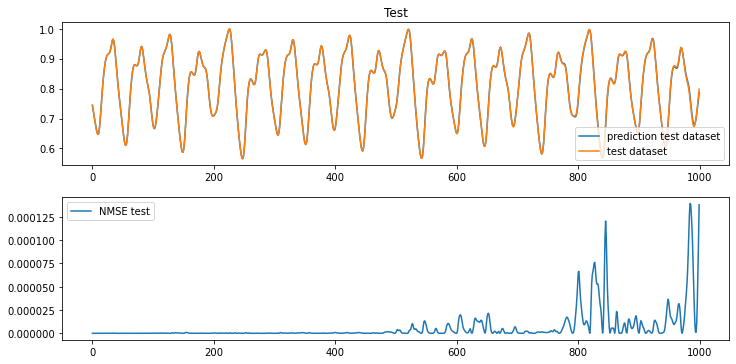

In [9]:
# using grid-searched-recursion parameters
esn_mg = loukas_esn.Esn(data_mg, rhoscale=rho_g, beta=beta_g, alpha=alpha_g, Ttrain=1000, Twashout=200, N=1000)
esn_mg.train()
#esn_mg.validate(val_time=1000)
esn_mg.test(test_time=1000)
print("nmse test: {}".format(esn_mg.nmse_test))
esn_mg.plot_test()